### Name: Chiranjeevi .K
### Roll No: 2023122010
### Assignment 4

### Q1 : Image Segmentation Using Thresholding


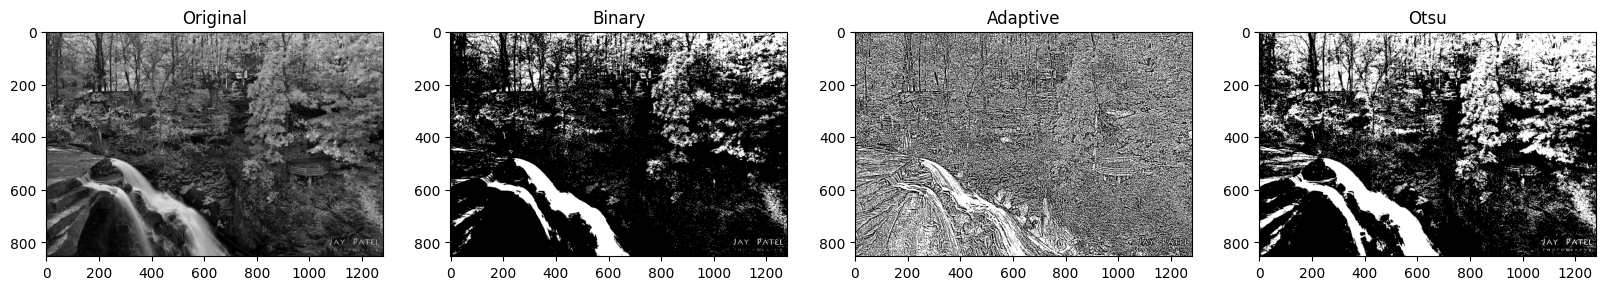

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load a grayscale image
img = cv2.imread('./img/grayscale_image.jpg', cv2.IMREAD_GRAYSCALE)

# Binary Thresholding
_, binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# Adaptive Thresholding
adaptive = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Otsu's Thresholding
_, otsu = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display images
titles = ['Original', 'Binary', 'Adaptive', 'Otsu']
images = [img, binary, adaptive, otsu]

plt.figure(figsize=(20, 8)) 
for i in range(4):
    plt.subplot(1, 4, i+1), plt.imshow(images[i], 'gray'), plt.title(titles[i])
plt.show()


### 1 c
Best Choice: Otsu's Thresholding
It works best here because it provides clear segmentation, highlighting the main features (like the waterfall) while avoiding the excessive noise or loss of details seen in the other methods.

### Q2: Line Detection Using Hough Transform


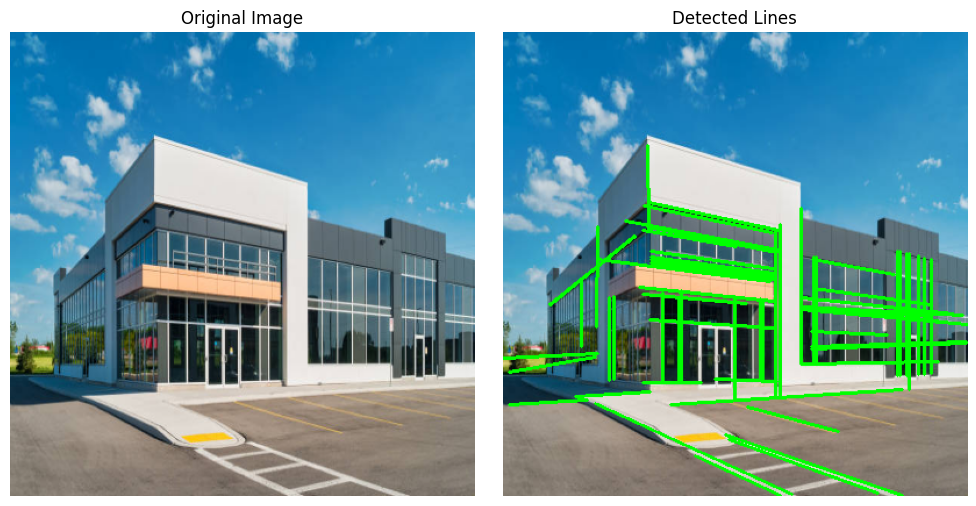

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and resize the image
img = cv2.imread('./img/lines_image2.jpg')
img_resized = cv2.resize(img, (400, 400))
gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)

# Canny edge detection
edges = cv2.Canny(gray, 100, 200)

# Probabilistic Hough Line Transform
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=80, minLineLength=50, maxLineGap=10)

# Draw detected lines
output_img = img_resized.copy()
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(output_img, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Display original and processed images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB))
plt.title('Detected Lines')
plt.axis('off')

plt.tight_layout()
plt.show()


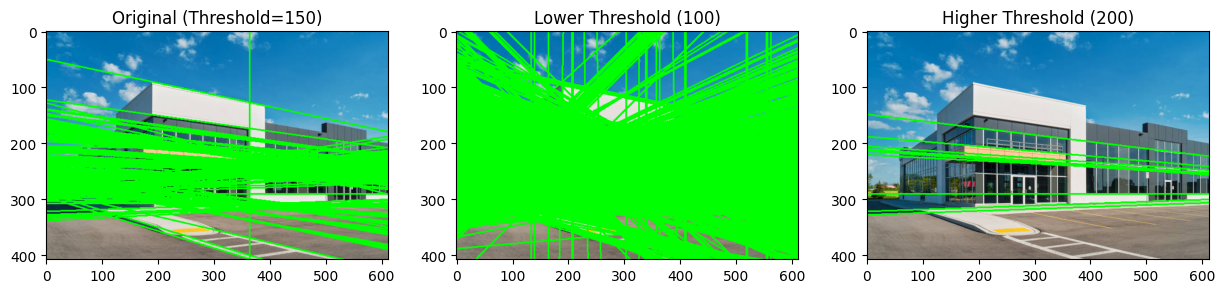

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the input image
img = cv2.imread('./img/lines_image2.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 150)

# Hough Line Transform (Original)
lines_original = cv2.HoughLines(edges, 1, np.pi / 180, 150)

# Experiment: Lower and higher thresholds
lines_low = cv2.HoughLines(edges, 1, np.pi / 180, 100)
lines_high = cv2.HoughLines(edges, 1, np.pi / 180, 200)

# Function to draw lines
def draw_lines(image, lines):
    output = image.copy()
    if lines is not None:
        for line in lines:
            rho, theta = line[0]
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * (a))
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * (a))
            cv2.line(output, (x1, y1), (x2, y2), (0, 255, 0), 2)
    return output

# Generate images with lines
img_original = draw_lines(img, lines_original)
img_low = draw_lines(img, lines_low)
img_high = draw_lines(img, lines_high)

# Display results
plt.figure(figsize=(15, 10))
plt.subplot(1, 3, 1), plt.imshow(cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB))
plt.title("Original (Threshold=150)")
plt.subplot(1, 3, 2), plt.imshow(cv2.cvtColor(img_low, cv2.COLOR_BGR2RGB))
plt.title("Lower Threshold (100)")
plt.subplot(1, 3, 3), plt.imshow(cv2.cvtColor(img_high, cv2.COLOR_BGR2RGB))
plt.title("Higher Threshold (200)")
plt.show()


### Q2 c
When I increased the threshold value, only the most prominent and well-defined lines were detected, which made the results cleaner but also missed some valid lines. Lowering the threshold brought in more lines, including weaker or noisy ones, cluttering the output.
Adjusting minLineLength and maxLineGap also made a difference. A shorter minLineLength caused broken or fragmented lines, while a higher maxLineGap allowed the algorithm to connect more broken segments, improving detection for interrupted lines.

### Q3: Circle Detection Using Hough Circle Transform


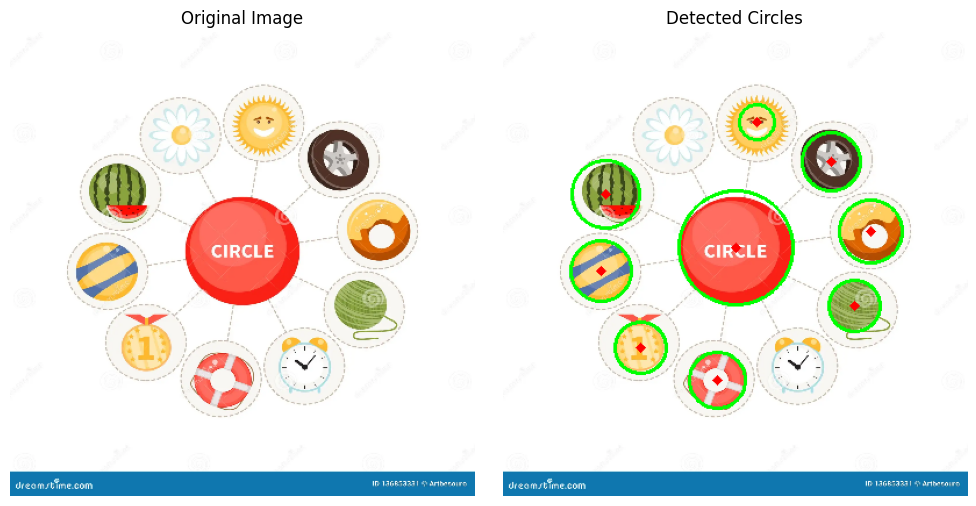

In [23]:
# Load and resize the image
img = cv2.imread('./img/circles_image2.jpg')
img_resized = cv2.resize(img, (400, 400))
gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)
gray = cv2.medianBlur(gray, 5)

# Hough Circle Transform
circles = cv2.HoughCircles(
    gray,
    cv2.HOUGH_GRADIENT,
    dp=1,
    minDist=20,
    param1=50,
    param2=30,
    minRadius=10,
    maxRadius=50
)

# Draw detected circles
output_img = img_resized.copy()
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        cv2.circle(output_img, (i[0], i[1]), i[2], (0, 255, 0), 2)
        cv2.circle(output_img, (i[0], i[1]), 2, (0, 0, 255), 3)

# Display original and processed images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB))
plt.title('Detected Circles')
plt.axis('off')

plt.tight_layout()
plt.show()


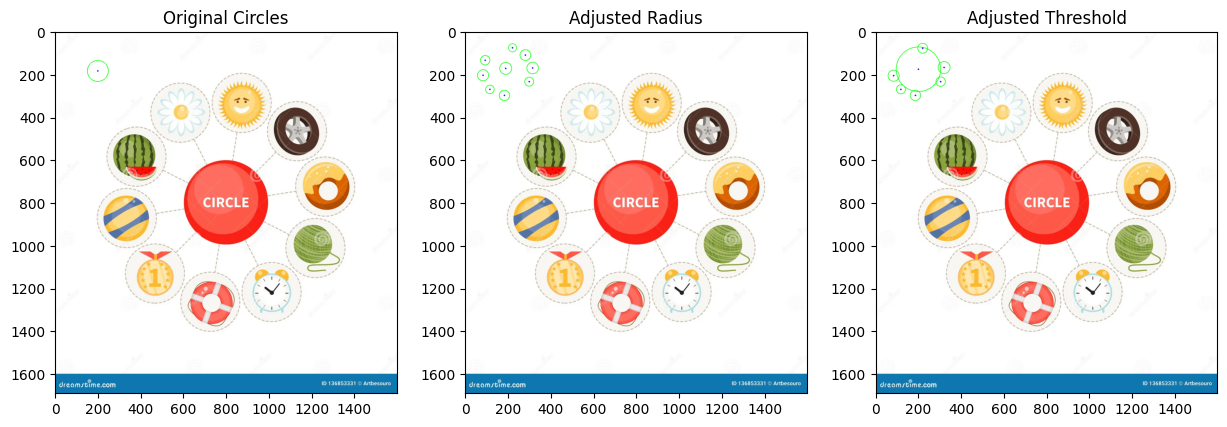

In [24]:
# Hough Circle Transform (Original)
circles_original = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=30, minRadius=30, maxRadius=50)

# Experiment 1: Adjust radius range
circles_adjusted_radius = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=20, minRadius=10, maxRadius=30)

# Experiment 2: Adjust accumulator threshold
circles_adjusted_threshold = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=45, minRadius=0, maxRadius=0)

# Draw circles on a copy of the image
def draw_circles(image, circles):
    output = image.copy()
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            cv2.circle(output, (i[0], i[1]), i[2], (0, 255, 0), 2)
            cv2.circle(output, (i[0], i[1]), 2, (255, 0, 0), 3)
    return output

img_circles_original = draw_circles(img, circles_original)
img_circles_radius = draw_circles(img, circles_adjusted_radius)
img_circles_threshold = draw_circles(img, circles_adjusted_threshold)

# Display results
plt.figure(figsize=(15, 10))
plt.subplot(1, 3, 1), plt.imshow(cv2.cvtColor(img_circles_original, cv2.COLOR_BGR2RGB))
plt.title("Original Circles")
plt.subplot(1, 3, 2), plt.imshow(cv2.cvtColor(img_circles_radius, cv2.COLOR_BGR2RGB))
plt.title("Adjusted Radius")
plt.subplot(1, 3, 3), plt.imshow(cv2.cvtColor(img_circles_threshold, cv2.COLOR_BGR2RGB))
plt.title("Adjusted Threshold")
plt.show()


### Q3 c
Narrowing the radius range helped focus on circles of a specific size, which made the detection more accurate by filtering out unrelated shapes. However, it missed circles that were too small or too big for the set range.
Lowering the accumulator threshold caused more circles to appear in the results, including some noise or partial shapes. Increasing it filtered out these false positives, but a few faint circles were no longer detected.

### Q4: Harris Corner Detection


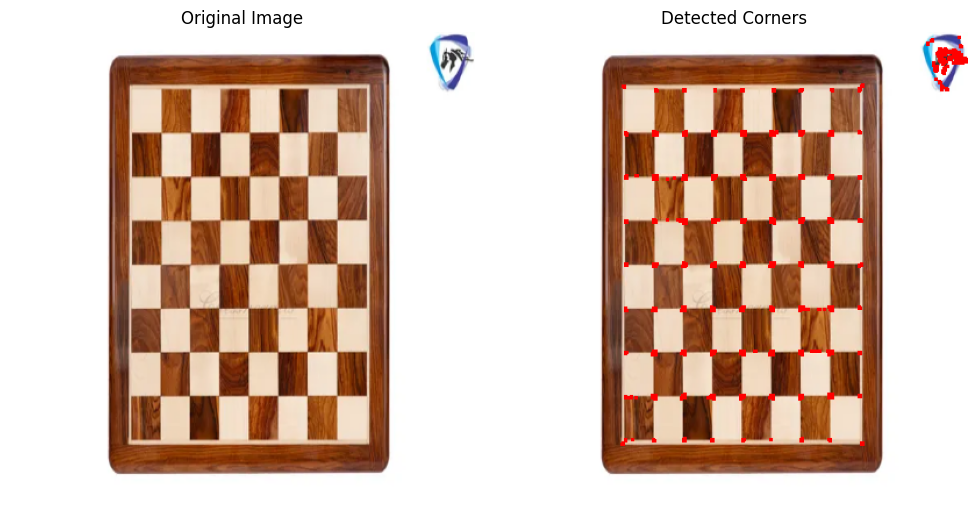

In [18]:
# Load and resize the image
img = cv2.imread('./img/corners_image.jpg')
img_resized = cv2.resize(img, (400, 400))
gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)

# Harris Corner Detection
gray = np.float32(gray)
dst = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)
dst = cv2.dilate(dst, None)

# Mark corners on the image
output_img = img_resized.copy()
output_img[dst > 0.01 * dst.max()] = [0, 0, 255]

# Display original and processed images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB))
plt.title('Detected Corners')
plt.axis('off')

plt.tight_layout()
plt.show()


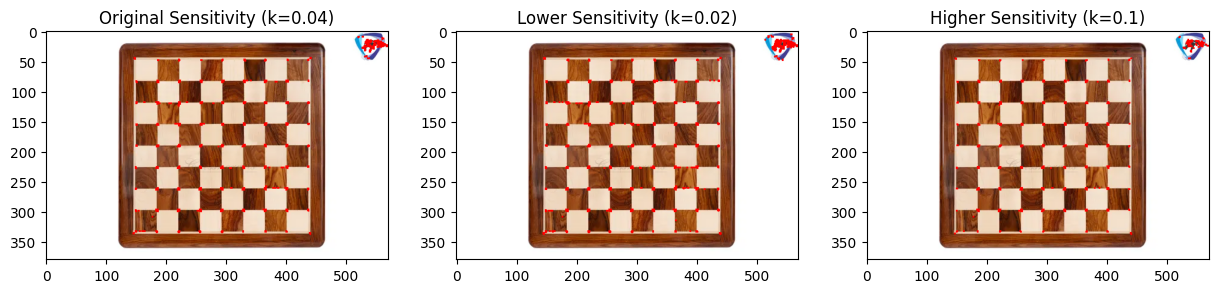

In [19]:
# Harris Corner Detection
def harris_corners(img, k):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)
    dst = cv2.cornerHarris(gray, 2, 3, k)
    dst = cv2.dilate(dst, None)
    result = img.copy()
    result[dst > 0.01 * dst.max()] = [0, 0, 255]
    return result

# Original sensitivity
img_harris_original = harris_corners(img, 0.04)

# Experiment 1: Lower sensitivity
img_harris_low = harris_corners(img, 0.02)

# Experiment 2: Higher sensitivity
img_harris_high = harris_corners(img, 0.1)

# Display results
plt.figure(figsize=(15, 10))
plt.subplot(1, 3, 1), plt.imshow(cv2.cvtColor(img_harris_original, cv2.COLOR_BGR2RGB))
plt.title("Original Sensitivity (k=0.04)")
plt.subplot(1, 3, 2), plt.imshow(cv2.cvtColor(img_harris_low, cv2.COLOR_BGR2RGB))
plt.title("Lower Sensitivity (k=0.02)")
plt.subplot(1, 3, 3), plt.imshow(cv2.cvtColor(img_harris_high, cv2.COLOR_BGR2RGB))
plt.title("Higher Sensitivity (k=0.1)")
plt.show()


Here in this image you dont see any changes because all the corners are having similar structure or environment in cornerss

### Q4 c
Usually,
A smaller k value (like 0.04) made the algorithm more sensitive, so it picked up a lot of corners, but some of them were unnecessary or noisy.
A larger k value (like 0.1) made it stricter, so only the strongest corners were detected, but finer details and weaker corners were left out.
It’s all about finding the right balance depending on what kind of features the image has.

### Q5: Theory

#### The Hough Transform for lines operates in a 2D parameter space (ρ, θ) where each edge point votes for possible lines. This makes it computationally efficient.
#### For circles, it uses a 3D parameter space (x, y, radius), requiring more computations as each edge point must consider multiple radii and center coordinates.
#### Additionally, line detection is simpler due to fewer parameters, while circle detection often involves preprocessing (e.g., smoothing) to improve accuracy and reduce noise. Computational complexity is significantly higher for circles compared to lines.